In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline


2020-05-10

In [2]:
# 상품 노출 캡
p_df = pd.read_csv('product_imp.csv')

In [17]:
# 샐러 노출 캡
s_df = pd.read_csv('seller_imp.csv')

In [9]:
# 뷰어 노출 캡
v_df = pd.read_csv('viewer_imp.csv')

## 상품 노출 캡

In [3]:
p_ref = pd.read_csv('imp1_ref_term.csv')

In [4]:
p_ref.head()

,content_id,product_imp_cnt,product_biz
0,100719587,7,0
1,99824188,1,0
2,99796392,1,0
3,100907670,1,1
4,100716218,1,0


In [105]:
print(p_ref['product_imp_cnt'].mean())
print(p_ref['product_imp_cnt'].median())

13.993827268700793
2.0


In [106]:
print(p_ref[p_ref['product_imp_cnt'] > 5]['product_imp_cnt'].mean())
print(p_ref[p_ref['product_imp_cnt'] > 5]['product_imp_cnt'].median())

41.66885396001831
19.0


In [107]:
print(p_ref[(p_ref['product_biz'] == 1) & (p_ref['product_imp_cnt'] > 5)]['product_imp_cnt'].mean())
print(p_ref[(p_ref['product_biz'] == 1) & (p_ref['product_imp_cnt'] > 5)]['product_imp_cnt'].median())

28.61508082776052
11.0


In [108]:
print(p_ref[(p_ref['product_biz'] == 0) & (p_ref['product_imp_cnt'] > 5)]['product_imp_cnt'].mean())
print(p_ref[(p_ref['product_biz'] == 0) & (p_ref['product_imp_cnt'] > 5)]['product_imp_cnt'].median())

42.688494585179065
20.0


In [110]:
print(p_ref[p_ref['product_biz'] == 0]['product_imp_cnt'].mean())
print(p_ref[p_ref['product_biz'] == 0]['product_imp_cnt'].median())

16.895224918104258
3.0


In [111]:
print(p_ref[p_ref['product_biz'] == 1]['product_imp_cnt'].mean())
print(p_ref[p_ref['product_biz'] == 1]['product_imp_cnt'].median())

4.1700332644808125
1.0


In [112]:
len(p_ref[p_ref['product_biz'] == 1])/len(p_ref)

0.2280042398086243

In [114]:
print(len(p_biz))
print(len(p_ref))

8337663
855699


In [117]:
p_biz['product_imp_cnt'].describe()

count    8.337663e+06
mean     1.970001e+01
std      2.586852e+02
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.300000e+01
max      1.686960e+05
Name: product_imp_cnt, dtype: float64

In [118]:
p_ref['product_imp_cnt'].describe()

count    855699.000000
mean         13.993827
std          52.789497
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       10242.000000
Name: product_imp_cnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x137f59050>,
 'caps': [<matplotlib.lines.Line2D at 0x137f59b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x137f543d0>],
 'medians': [<matplotlib.lines.Line2D at 0x137f5d590>],
 'fliers': [<matplotlib.lines.Line2D at 0x137f5da90>],
 'means': []}

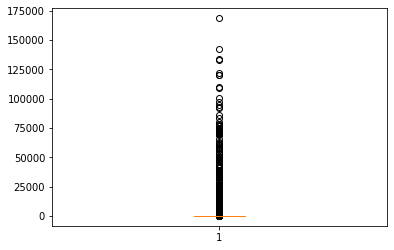

In [127]:
plt.boxplot(p_biz[(p_biz['product_imp_cnt'] > 5)]['product_imp_cnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13811fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x138123950>,
 'boxes': [<matplotlib.lines.Line2D at 0x13811f210>],
 'medians': [<matplotlib.lines.Line2D at 0x13811ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13812a8d0>],
 'means': []}

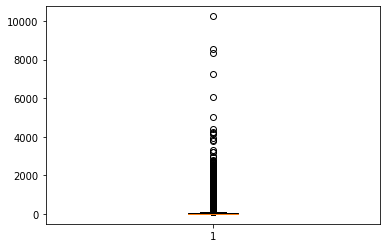

In [128]:
plt.boxplot(p_ref[(p_ref['product_imp_cnt'] > 5)]['product_imp_cnt'])

In [122]:
len(p_biz[(p_biz['product_imp_cnt'] > 5) & (p_biz['product_imp_cnt'] < 100)])/len(p_biz)

0.39241523673959955

In [123]:
len(p_ref[(p_ref['product_imp_cnt'] > 5) & (p_ref['product_imp_cnt'] < 100)])/len(p_ref)

0.2790794426544848

In [5]:
p_df['product_imp_cnt'].mean()

19.698957320486578

In [25]:
p_df['product_imp_cnt'].median()

4.0

In [11]:
p_df[p_df['product_imp_cnt'] == p_df['product_imp_cnt'].max()]

,content_id,product_imp_cnt
350652,124223866,168696


In [12]:
q1 = p_df['product_imp_cnt'].quantile(0.25)
q3 = p_df['product_imp_cnt'].quantile(0.75)
iqr = q3-q1
p_df[(p_df['product_imp_cnt'] >= (q1-(1.5*iqr))) & (p_df['product_imp_cnt'] <= (q3+(1.5*iqr)))]['product_imp_cnt'].mean()

5.881662698415422

In [26]:
q1 = p_df['product_imp_cnt'].quantile(0.25)
q3 = p_df['product_imp_cnt'].quantile(0.75)
iqr = q3-q1
p_df[(p_df['product_imp_cnt'] >= (q1-(1.5*iqr))) & (p_df['product_imp_cnt'] <= (q3+(1.5*iqr)))]['product_imp_cnt'].median()

3.0

Text(0, 0.5, '# products')

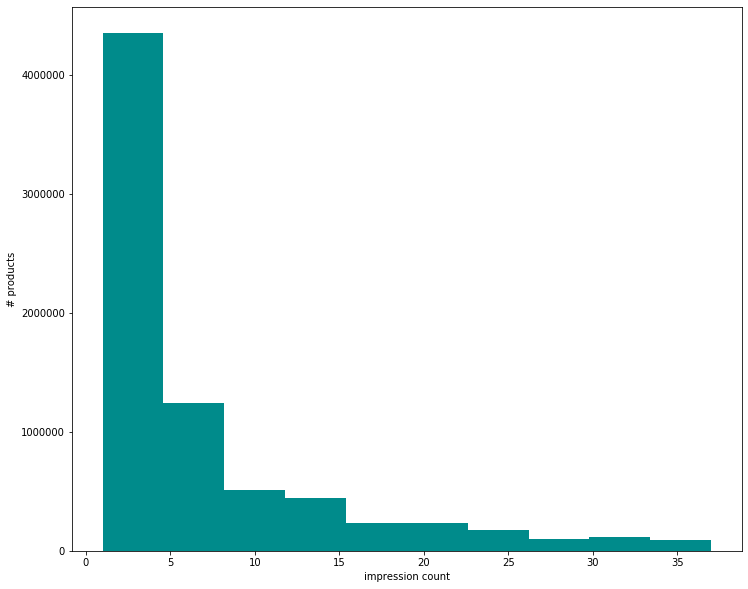

In [50]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.hist(p_df[p_df['product_imp_cnt'] < p_df['product_imp_cnt'].quantile(0.9)]['product_imp_cnt'], color='darkcyan')
plt.xlabel('impression count')
plt.ylabel('# products')

{'whiskers': [<matplotlib.lines.Line2D at 0x13235ebd0>,
 'caps': [<matplotlib.lines.Line2D at 0x13235ea50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13235eb90>],
 'medians': [<matplotlib.lines.Line2D at 0x13236ed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x13236ad10>],
 'means': []}

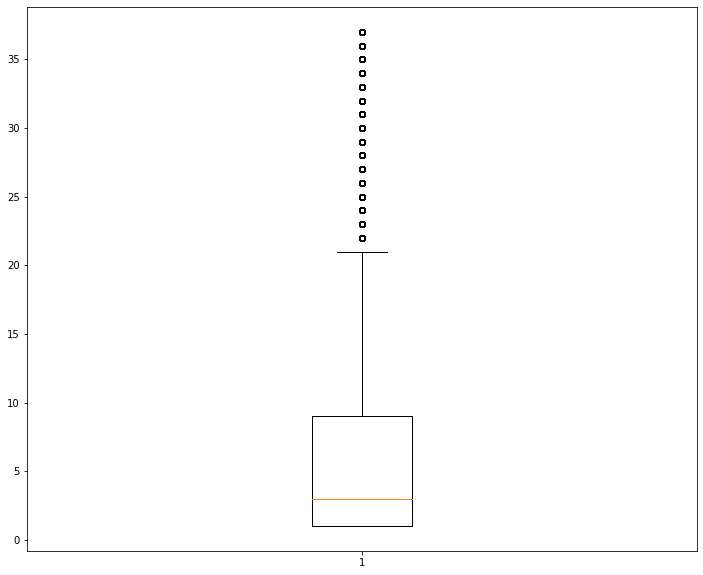

In [48]:

plt.figure(figsize=(12, 10))
plt.boxplot(p_df[p_df['product_imp_cnt'] < p_df['product_imp_cnt'].quantile(0.9)]['product_imp_cnt'])

In [5]:
p_biz = pd.read_csv('imp1_biz.csv')

In [43]:
p_biz.columns

Index(['content_id', 'product_imp_cnt', 'product_biz'], dtype='object')

In [44]:
p_biz = p_biz.dropna()
p_noout = p_biz[p_biz['product_imp_cnt'] > 5]

In [45]:
p_noout['product_imp_cnt'].mean()

42.995699305790595

In [46]:
p_noout['product_imp_cnt'].median()

16.0

(array([3.57788e+06, 5.60000e+01, 3.10000e+01, 1.40000e+01, 3.10000e+01,
        6.00000e+00, 2.00000e+00, 5.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([6.00000e+00, 1.68750e+04, 3.37440e+04, 5.06130e+04, 6.74820e+04,
        8.43510e+04, 1.01220e+05, 1.18089e+05, 1.34958e+05, 1.51827e+05,
        1.68696e+05]),
 <a list of 10 Patch objects>)

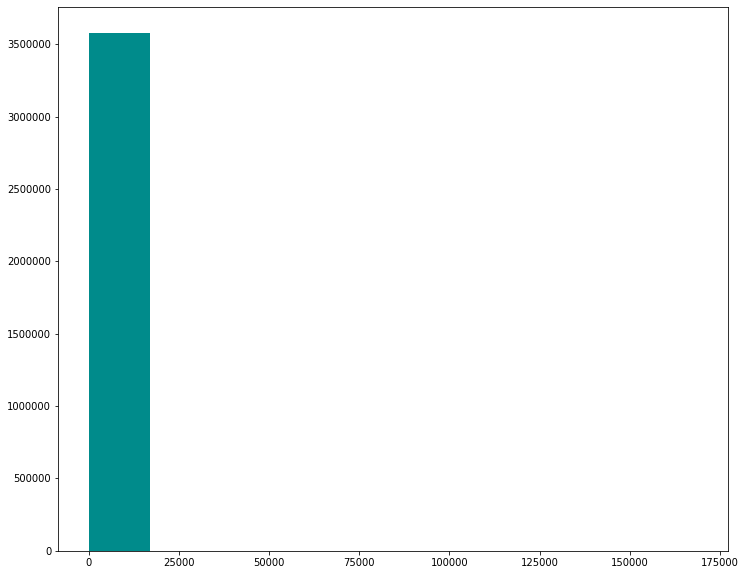

In [63]:
plt.figure(figsize=(12, 10))
plt.hist(p_noout['product_imp_cnt'], color='darkcyan')

In [8]:
len(p_biz[p_biz['product_biz'] == 1])/len(p_biz)

0.3945365745773126

In [47]:
p_biz1 = p_biz[p_biz['product_biz'] == 1]
p_biz0 = p_biz[p_biz['product_biz'] == 0]

In [48]:
len(p_biz1)/len(p_biz)

0.3945365745773126

In [83]:
p_biz['product_imp_cnt'].quantile(0.3)

2.0

In [49]:
p_biz1[p_biz1['product_imp_cnt'] > 5]['product_imp_cnt'].mean()

25.794854279582022

In [50]:
p_biz1[p_biz1['product_imp_cnt'] > 5]['product_imp_cnt'].median()

13.0

In [51]:
p_biz0[p_biz0['product_imp_cnt'] > 5]['product_imp_cnt'].mean()

51.97021894643723

In [53]:
p_biz0[p_biz0['product_imp_cnt'] > 5]['product_imp_cnt'].median()

18.0

In [16]:
p_biz1['product_imp_cnt'].describe()

count    3.289513e+06
mean     1.101016e+01
std      2.100302e+02
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      9.000000e+00
max      8.343500e+04
Name: product_imp_cnt, dtype: float64

In [18]:
p_biz0['product_imp_cnt'].mean()

25.36255440111724

In [19]:
p_biz0['product_imp_cnt'].median()

5.0

(array([3.28946e+06, 1.90000e+01, 8.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.10000e+01, 4.00000e+00]),
 array([1.00000e+00, 8.34440e+03, 1.66878e+04, 2.50312e+04, 3.33746e+04,
        4.17180e+04, 5.00614e+04, 5.84048e+04, 6.67482e+04, 7.50916e+04,
        8.34350e+04]),
 <a list of 10 Patch objects>)

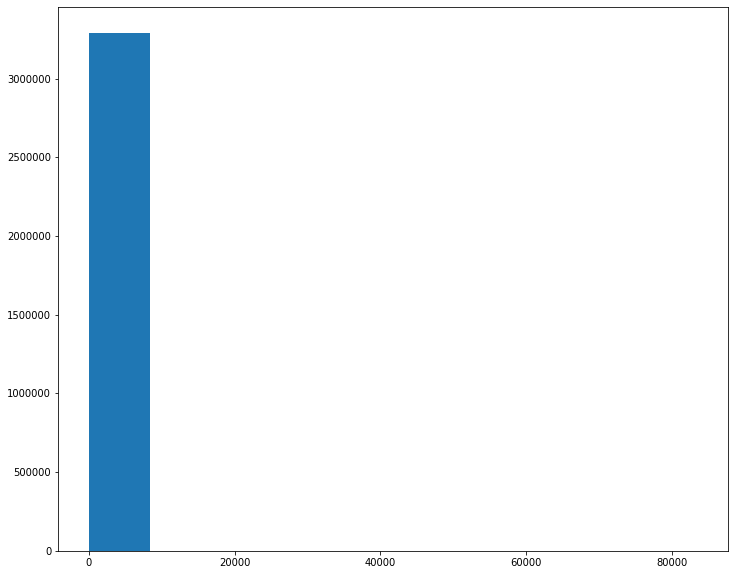

In [17]:
plt.figure(figsize=(12, 10))
plt.hist(p_biz1['product_imp_cnt'])

In [12]:
cnt = []
for i in p_biz1['product_imp_cnt'].tolist():
    if i >= 5:
        cnt.append(5)
    else:
        cnt.append(i)
p_biz1['group'] = cnt
p_biz1.groupby('group')['content_id'].count()

/Users/emilyPark/.pyenv/versions/3.7.5/envs/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


group
1     871120
2     464896
3     314466
4     231856
5    1407175
Name: content_id, dtype: int64

In [65]:
ad_p = pd.read_csv('ad_prod_imp_cnt.csv')

In [66]:
ad_p

,content_id,product_imp_cnt,product_biz
0,100718548,244,1
1,100902843,4,1
2,99846914,796,1
3,99780689,24,1
4,99876298,484,1
...,...,...,...
50970,122953395,269,1
50971,124122207,1198,1
50972,116214231,166,1
50973,123761663,374,1


In [67]:
print(len(p_biz))
print(len(ad_p))

8337663
50975


In [69]:
p_biz['product_imp_cnt'].describe()

count    8.337663e+06
mean     1.970001e+01
std      2.586852e+02
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.300000e+01
max      1.686960e+05
Name: product_imp_cnt, dtype: float64

In [68]:
ad_p['product_imp_cnt'].describe()

count    50975.000000
mean       333.616655
std        842.593116
min          1.000000
25%         12.000000
50%        134.000000
75%        346.000000
max      51615.000000
Name: product_imp_cnt, dtype: float64

In [73]:
print(ad_p[ad_p['product_imp_cnt'] > 5]['product_imp_cnt'].mean())
print(ad_p[ad_p['product_imp_cnt'] > 5]['product_imp_cnt'].median())

422.6572615759747
205.0


In [72]:
print(ad_p['product_imp_cnt'].mean())
print(ad_p['product_imp_cnt'].median())

333.6166552231486
134.0


In [74]:
print(ad_p[(ad_p['product_biz'] == 1) & (ad_p['product_imp_cnt'] > 5)]['product_imp_cnt'].mean())
print(ad_p[(ad_p['product_biz'] == 1) & (ad_p['product_imp_cnt'] > 5)]['product_imp_cnt'].median())

423.25179350825266
205.0


In [77]:
print(ad_p[ad_p['product_biz'] == 1]['product_imp_cnt'].mean())
print(ad_p[ad_p['product_biz'] == 1]['product_imp_cnt'].median())

335.2998074594573
136.0


In [78]:
print(ad_p[(ad_p['product_biz'] == 0) & (ad_p['product_imp_cnt'] > 5)]['product_imp_cnt'].mean())
print(ad_p[(ad_p['product_biz'] == 0) & (ad_p['product_imp_cnt'] > 5)]['product_imp_cnt'].median())

349.72923076923075
142.0


In [79]:
print(ad_p[ad_p['product_biz'] == 0]['product_imp_cnt'].mean())
print(ad_p[ad_p['product_biz'] == 0]['product_imp_cnt'].median())

191.34228187919464
18.5


In [81]:
len(ad_p[ad_p['product_biz'] == 1])/len(ad_p)

0.9883079941147621

In [9]:
p_biz = p_biz.dropna()

In [12]:
biz = p_biz[p_biz['product_biz'] == 1]
normal = p_biz[p_biz['product_biz'] == 0]

In [13]:
import seaborn as sns


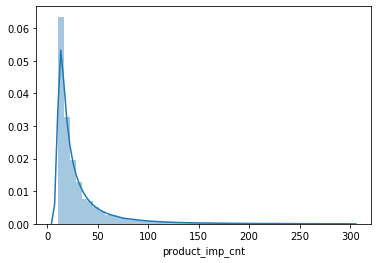

In [22]:
sns.distplot(biz[(biz['product_imp_cnt'] > 10) & (biz['product_imp_cnt'] < 300)]['product_imp_cnt'])

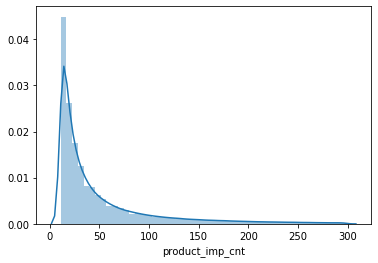

In [25]:
sns.distplot(normal[(normal['product_imp_cnt'] > 10) & (normal['product_imp_cnt'] < 300)]['product_imp_cnt'])

In [26]:
normal['product_imp_cnt'].std()

285.8274280626563

In [29]:
normal[normal['product_imp_cnt'] == normal['product_imp_cnt'].max()]

,content_id,product_imp_cnt,product_biz
8026451,124223866,168696,0


# 샐러 노출 캡

In [54]:
s_biz = pd.read_csv('imp2_biz.csv')

In [55]:
s_biz = s_biz.dropna()
s_biz.head()

,user_id,seller_imp_cnt,content_cnt,avg_imp_cnt,biz
0,9380319,20,1,20,0
1,9349380,1,1,1,0
2,9397979,23,1,23,0
3,9352338,8,1,8,0
4,9374162,10,1,10,0


In [56]:
s_biz['seller_imp_cnt'].describe()

count    1.002107e+06
mean     1.639067e+02
std      1.242996e+03
min      1.000000e+00
25%      5.000000e+00
50%      1.700000e+01
75%      6.600000e+01
max      3.305420e+05
Name: seller_imp_cnt, dtype: float64

In [61]:
s_biz[s_biz['avg_imp_cnt'] == 1].shape[0]/len(s_biz)

0.12415939615230709

In [87]:
print(s_biz[s_biz['seller_imp_cnt'] > 40]['seller_imp_cnt'].mean())
print(s_biz[s_biz['seller_imp_cnt'] > 40]['seller_imp_cnt'].median())

478.143130021791
140.0


In [93]:
s_biz[s_biz['biz'] == 1]['content_cnt'].mean()*5

268.47907348764323

In [94]:
s_biz[s_biz['biz'] == 0]['content_cnt'].mean()*5

26.82774527153782

In [95]:
print(s_biz[(s_biz['biz'] == 1) & (s_biz['seller_imp_cnt'] > 270)]['seller_imp_cnt'].mean())
print(s_biz[(s_biz['biz'] == 1) & (s_biz['seller_imp_cnt'] > 270)]['seller_imp_cnt'].median())

2361.7726986789685
770.0


In [96]:
print(s_biz[(s_biz['biz'] == 0) & (s_biz['seller_imp_cnt'] > 25)]['seller_imp_cnt'].mean())
print(s_biz[(s_biz['biz'] == 0) & (s_biz['seller_imp_cnt'] > 25)]['seller_imp_cnt'].median())

325.8535190422074
88.0


In [98]:
print(s_biz[(s_biz['biz'] == 1) & (s_biz['avg_imp_cnt'] > 5)]['avg_imp_cnt'].mean())
print(s_biz[(s_biz['biz'] == 1) & (s_biz['avg_imp_cnt'] > 5)]['avg_imp_cnt'].median())

32.62933686125351
13.0


In [99]:
print(s_biz[(s_biz['biz'] == 0) & (s_biz['avg_imp_cnt'] > 5)]['avg_imp_cnt'].mean())
print(s_biz[(s_biz['biz'] == 0) & (s_biz['avg_imp_cnt'] > 5)]['avg_imp_cnt'].median())

40.31943424266753
16.0


In [100]:
print(s_biz[s_biz['avg_imp_cnt'] > 5]['avg_imp_cnt'].mean())
print(s_biz[s_biz['avg_imp_cnt'] > 5]['avg_imp_cnt'].median())

39.90207932450674
16.0


In [33]:
print(s_biz1['seller_imp_cnt'].mean())
print(s_biz1['seller_imp_cnt'].median())
print(s_biz1['avg_imp_cnt'].mean())
print(s_biz1['avg_imp_cnt'].median())

591.1992752440339
46.0
17.42092977702328
5.0


In [34]:
print(s_biz0['seller_imp_cnt'].mean())
print(s_biz0['seller_imp_cnt'].median())
print(s_biz0['avg_imp_cnt'].mean())
print(s_biz0['avg_imp_cnt'].median())

136.08402978173876
16.0
23.736079800604774
7.0


Text(0, 0.5, 'count')

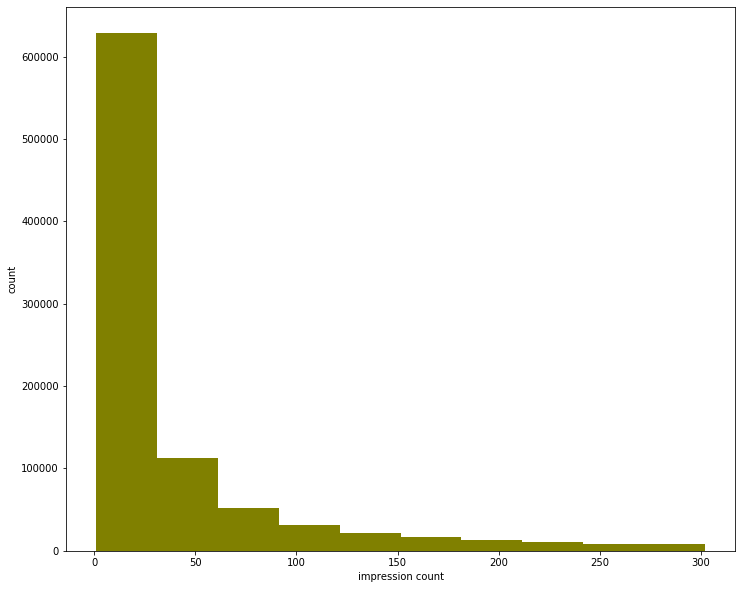

In [64]:
plt.figure(figsize=(12, 10))
plt.hist(s_df[s_df['seller_imp_cnt'] < s_df['seller_imp_cnt'].quantile(0.9)]['seller_imp_cnt'], color = 'olive', bins=10)
plt.xlabel('impression count')
plt.ylabel('count')

Text(0, 0.5, 'count')

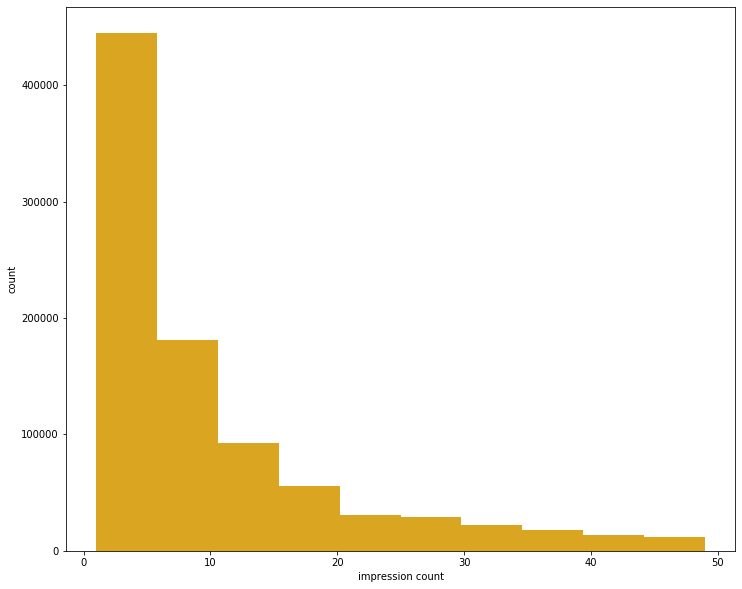

In [65]:
plt.figure(figsize=(12, 10))
plt.hist(s_df[s_df['avg_imp_cnt'] < s_df['avg_imp_cnt'].quantile(0.9)]['avg_imp_cnt'], color = 'goldenrod', bins=10)
plt.xlabel('impression count')
plt.ylabel('count')

In [18]:
s_df['seller_imp_cnt'].mean()

163.90606682327018

In [27]:
s_df['seller_imp_cnt'].median()

17.0

In [19]:
s_df['seller_imp_cnt'].max()

330542

In [20]:
q1 = s_df['seller_imp_cnt'].quantile(0.25)
q3 = s_df['seller_imp_cnt'].quantile(0.75)
iqr = q3-q1
s_df[(s_df['seller_imp_cnt'] >= (q1-(1.5*iqr))) & (s_df['seller_imp_cnt'] <= (q3+(1.5*iqr)))]['seller_imp_cnt'].mean()

25.64968576483509

In [28]:
q1 = s_df['seller_imp_cnt'].quantile(0.25)
q3 = s_df['seller_imp_cnt'].quantile(0.75)
iqr = q3-q1
s_df[(s_df['seller_imp_cnt'] >= (q1-(1.5*iqr))) & (s_df['seller_imp_cnt'] <= (q3+(1.5*iqr)))]['seller_imp_cnt'].median()

12.0

In [21]:
s_df['avg_imp_cnt'].mean()

23.350095698459047

In [29]:
s_df['avg_imp_cnt'].median()

7.0

In [23]:
s_df['avg_imp_cnt'].max()

71053

In [22]:
q1 = s_df['avg_imp_cnt'].quantile(0.25)
q3 = s_df['avg_imp_cnt'].quantile(0.75)
iqr = q3-q1
s_df[(s_df['avg_imp_cnt'] >= (q1-(1.5*iqr))) & (s_df['avg_imp_cnt'] <= (q3+(1.5*iqr)))]['avg_imp_cnt'].mean()

8.76198067231008

In [30]:
q1 = s_df['avg_imp_cnt'].quantile(0.25)
q3 = s_df['avg_imp_cnt'].quantile(0.75)
iqr = q3-q1
s_df[(s_df['avg_imp_cnt'] >= (q1-(1.5*iqr))) & (s_df['avg_imp_cnt'] <= (q3+(1.5*iqr)))]['avg_imp_cnt'].median()

5.0

# 뷰어 노출 캡

In [24]:
v_df

,imp_cnt_for_viewer,freq
0,3,3301033
1,8,113861
2,17,6977
3,13,18884
4,12,26396
...,...,...
333,866,1
334,708,1
335,297,1
336,588,1


In [130]:
v_df = pd.read_csv('viewer_imp_cnt.csv')

In [131]:
v_df = v_df.dropna()

In [133]:
v_df.head()

,user_id,content_id,imp_cnt_for_viewer
0,5652415.0,113972881,1
1,1284803.0,124225113,1
2,4714271.0,113284512,1
3,6096190.0,124214088,1
4,2201459.0,122861849,1


In [134]:
print(v_df[v_df['imp_cnt_for_viewer'] > 2]['imp_cnt_for_viewer'].mean())
print(v_df[v_df['imp_cnt_for_viewer'] > 2]['imp_cnt_for_viewer'].median())

4.250271927998308
3.0


In [62]:
v_df['imp_cnt_for_viewer'].mean()

1.2582820474396135

In [63]:
v_df['imp_cnt_for_viewer'].median()

1.0

Text(0, 0.5, 'count')

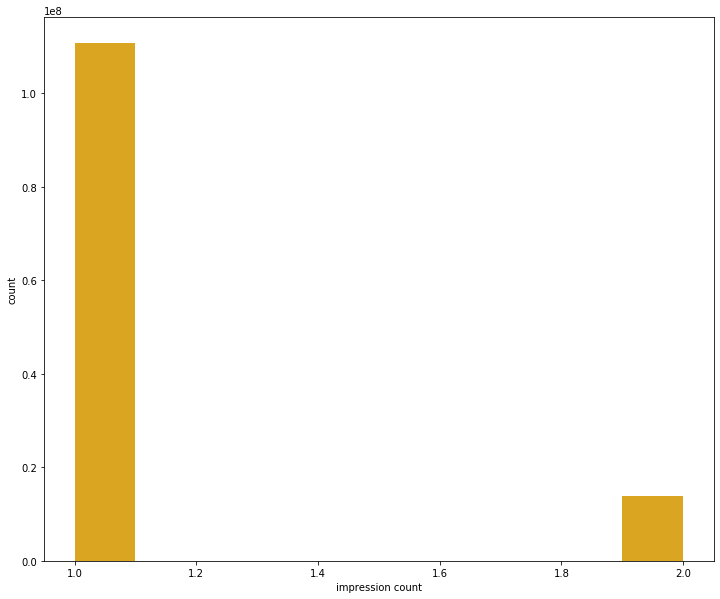

In [68]:
plt.figure(figsize=(12, 10))
plt.hist(v_df[v_df['imp_cnt_for_viewer'] <= v_df['imp_cnt_for_viewer'].quantile(0.9)]['imp_cnt_for_viewer'], color = 'goldenrod', bins=10)
plt.xlabel('impression count')
plt.ylabel('count')

In [2]:
v_biz = pd.read_csv('viewer_cap_biz.csv')

In [3]:
biz = v_biz[v_biz['biz'] == 1]
normal = v_biz[v_biz['biz'] == 0]

In [4]:
biz.head()

,user_id,content_id,biz,imp_cnt_for_viewer
2,7942385.0,109982096,1,1
8,2459887.0,111111998,1,1
9,3765976.0,111628261,1,1
10,8310661.0,123725681,1,1
15,6922783.0,68257813,1,1


In [5]:
biz.groupby('imp_cnt_for_viewer', as_index=False)['user_id'].count()

,imp_cnt_for_viewer,user_id
0,1,23710286
1,2,2424480
2,3,534867
3,4,196066
4,5,84340
...,...,...
137,266,0
138,271,0
139,386,1
140,582,1


In [6]:
normal.groupby('imp_cnt_for_viewer', as_index=False)['user_id'].count()

,imp_cnt_for_viewer,user_id
0,1,79039180
1,2,9992271
2,3,2358030
3,4,929918
4,5,414263
...,...,...
234,909,1
235,925,1
236,936,1
237,937,1


In [8]:
v_df = pd.read_csv('viewer_imp_cnt.csv')

In [21]:
print(len(biz)/len(v_biz))

0.2247675586418298


In [24]:
len(v_biz)

120992345

In [23]:
print(len(v_biz[v_biz['imp_cnt_for_viewer'] == 1]))
print(len(normal[normal['imp_cnt_for_viewer'] == 1]))
print(len(biz[biz['imp_cnt_for_viewer'] == 1]))


103125535
79324661
23800874


In [25]:
print(v_biz['imp_cnt_for_viewer'].mean())
print(v_biz['imp_cnt_for_viewer'].median())
print(biz['imp_cnt_for_viewer'].mean())
print(biz['imp_cnt_for_viewer'].median())
print(normal['imp_cnt_for_viewer'].mean())
print(normal['imp_cnt_for_viewer'].median())

1.2465597720252468
1.0
1.1988329611959543
1.0
1.2603974782144596
1.0


In [26]:
print(v_biz[v_biz['imp_cnt_for_viewer'] > 1]['imp_cnt_for_viewer'].mean())
print(v_biz[v_biz['imp_cnt_for_viewer'] > 1]['imp_cnt_for_viewer'].median())
print(biz[biz['imp_cnt_for_viewer'] > 1]['imp_cnt_for_viewer'].mean())
print(biz[biz['imp_cnt_for_viewer'] > 1]['imp_cnt_for_viewer'].median())
print(normal[normal['imp_cnt_for_viewer'] > 1]['imp_cnt_for_viewer'].mean())
print(normal[normal['imp_cnt_for_viewer'] > 1]['imp_cnt_for_viewer'].median())

2.669679422347918
2.0
2.59306038394004
2.0
2.6876490841615115
2.0


In [28]:
print(v_df[v_df['imp_cnt_for_viewer'] > 1]['imp_cnt_for_viewer'].median())

2.0


# 반복 클릭 vs 뷰어 노출 캡

In [3]:
df = pd.read_csv('view_imp_cnt.csv')

In [4]:
df.head()

,click_user_id,click_content_id,click_biz,click_cnt,imp_user_id,imp_content_id,imp_biz,imp_cnt_for_viewer
0,7418488.0,124217240.0,0.0,1.0,NaN,NaN,NaN,NaN
1,2914000.0,114455636.0,0.0,2.0,2914000.0,114455636.0,0.0,1.0
2,9560985.0,121003401.0,0.0,2.0,9560985.0,121003401.0,0.0,1.0
3,222192.0,122398232.0,0.0,2.0,222192.0,122398232.0,0.0,1.0
4,11173591.0,122246877.0,0.0,2.0,11173591.0,122246877.0,0.0,2.0


In [7]:
df[df['click_cnt'] == df['imp_cnt_for_viewer']].groupby('click_cnt', as_index=False)['click_user_id'].count()

,click_cnt,click_user_id
0,1.0,1622090
1,2.0,81868
2,3.0,9968
3,4.0,2753
4,5.0,857
5,6.0,396
6,7.0,164
7,8.0,127
8,9.0,68
9,10.0,45


In [18]:
# tdf = df.dropna()
len(tdf[(tdf['click_cnt'] == 1) & (tdf['imp_cnt_for_viewer'] >= 3)])/len(tdf[(tdf['click_cnt'] == 1)])

0.13248254561477613

In [34]:
df = df[df['imp_cnt_for_viewer'].notna()]

In [ ]:
df[df['click_cnt']/df['imp_cnt']]